In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Advertising.csv',index_col=0)


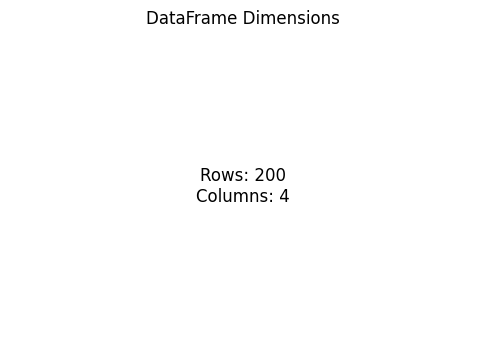

In [6]:

rows, columns = df.shape

# Create a text annotation to display the dimensions
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Rows: {rows}\nColumns: {columns}', fontsize=12, ha='center', va='center')
plt.axis('off')
plt.title('DataFrame Dimensions')
plt.show()



In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
# Display basic statistics of the dataset
print(df.describe())




               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [8]:
# Display the correlation matrix
print(df.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


In [9]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

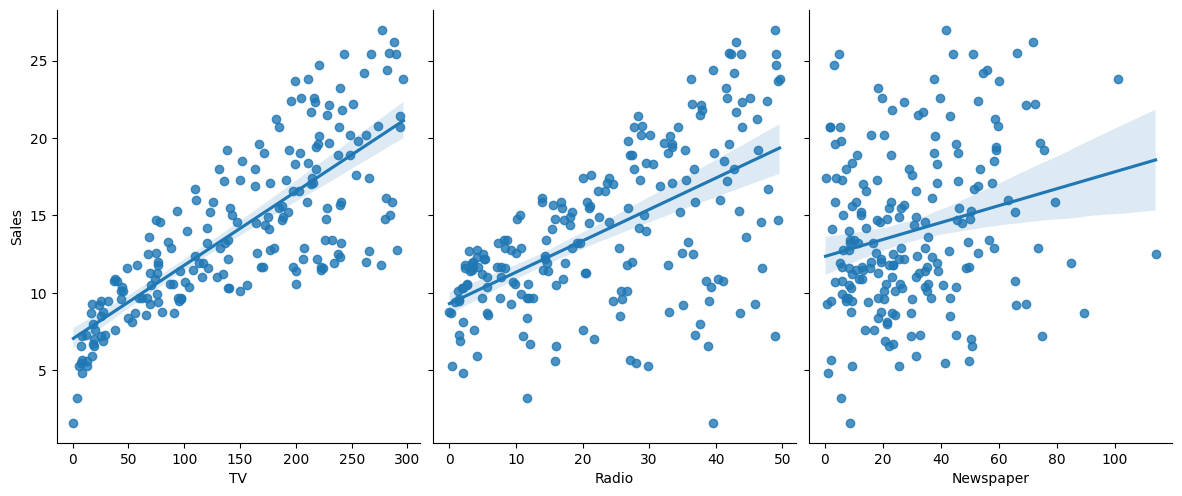

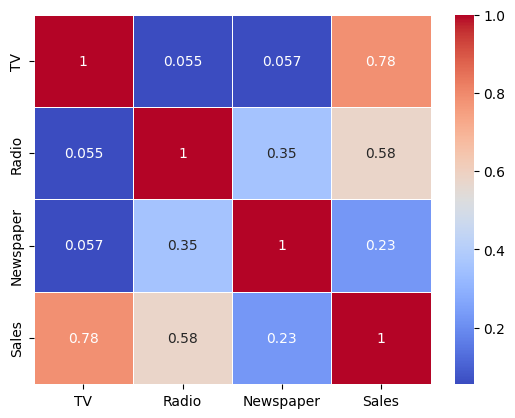

In [10]:

# Visualize the relationships between variables
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.show()

# Heatmap for correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


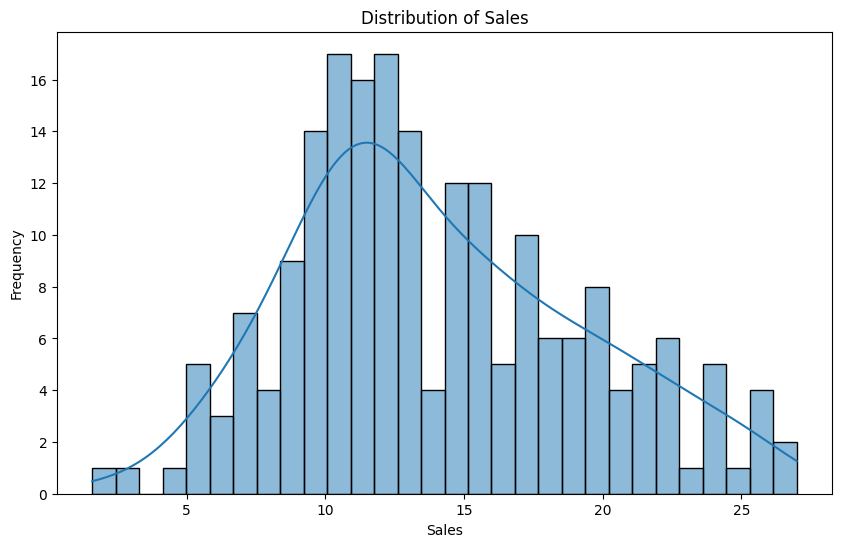

In [18]:
# Distribution of Sales

plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

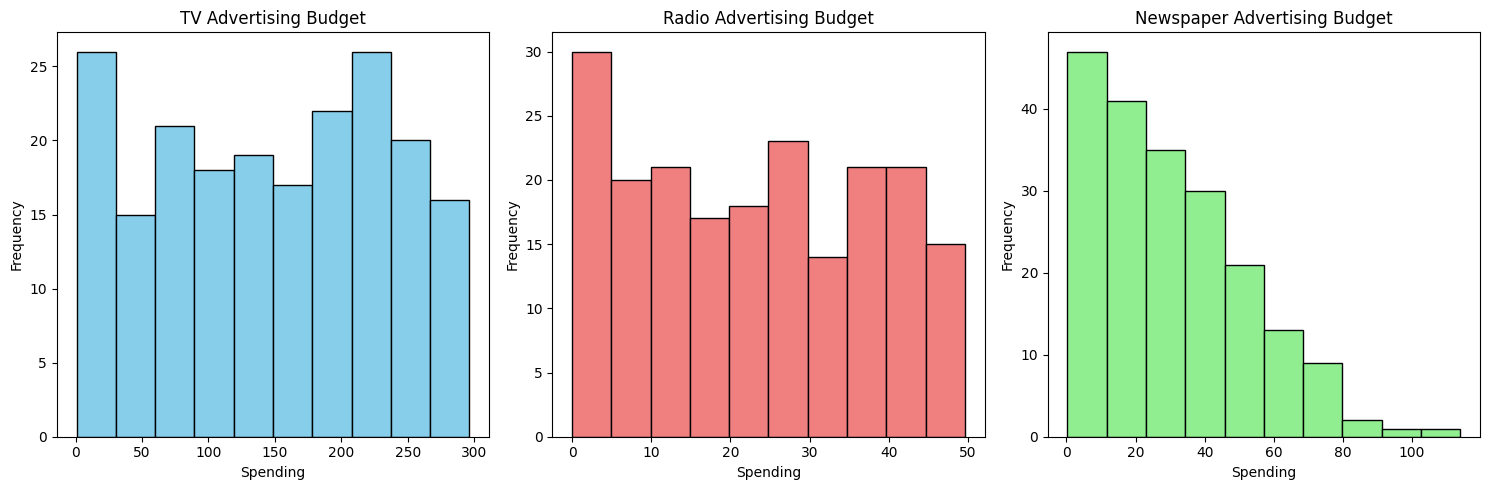

In [19]:
# Create subplots for each histogram

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for 'TV,' 'Radio,' and 'Newspaper' columns
df["TV"].plot.hist(ax=axes[0], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('TV Advertising Budget')
axes[0].set_xlabel('Spending')
axes[0].set_ylabel('Frequency')
df["Radio"].plot.hist(ax=axes[1], bins=10, color='lightcoral', edgecolor='black')
axes[1].set_title('Radio Advertising Budget')
axes[1].set_xlabel('Spending')
axes[1].set_ylabel('Frequency')

df["Newspaper"].plot.hist(ax=axes[2], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Newspaper Advertising Budget')
axes[2].set_xlabel('Spending')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()


In [13]:
model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.1740973539761033


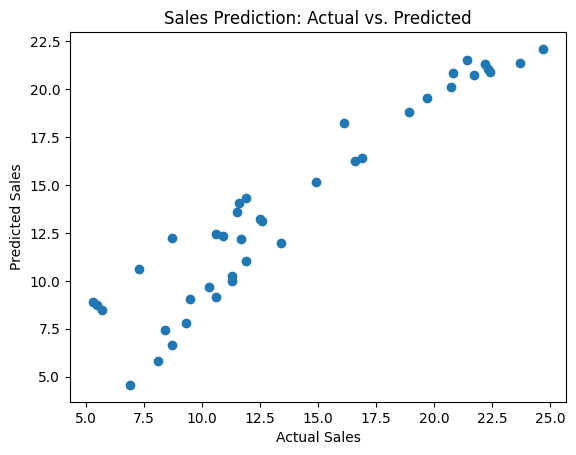

In [30]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Sales Prediction: Actual vs. Predicted')
plt.show()
